# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time,\
pickup location,drop location and no. of passengers. 

Dataset Link: [new york city taxi fare prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)

## Dataset Description
**File descriptions**
* **train.csv** - Input features and target fare_amount values for the training set (about 55M rows).
* **test.csv**- Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.
* **sample_submission.csv** - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.
### Data fields
#### ID
* **key** - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field.
Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.
#### Features
* **pickup_datetime** - timestamp value indicating when the taxi ride started.
* **pickup_longitude** - float for longitude coordinate of where the taxi ride started.
* **pickup_latitude** - float for latitude coordinate of where the taxi ride started.
* **dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.
* **dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.
* **passenger_count** - integer indicating the number of passengers in the taxi ride.
#### Target
* **fare_amount** - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

Imports required libs/modules

In [85]:
import opendatasets as od
import pandas as pd
import random

## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas


Dataset link:  [new york city taxi fare prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview)

### Download Data from Kaggle

We'll use the [opendatasets]( https://github.com/JovianML/opendatasets) library

In [86]:
dataset_url = 'https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data'

In [87]:
od.download(dataset_url)

Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)


In [88]:
data_dir = './new-york-city-taxi-fare-prediction'

Using shell commands because python modules are very slow with large data so instead of using OS modelu,\
we are using shell commands

In [89]:
# List of files with size
!ls -lh {data_dir}

total 5,4G
-rw-r--r-- 1 root root  486 29. Dez 13:42 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K 29. Dez 13:42 sample_submission.csv
-rw-r--r-- 1 root root 960K 29. Dez 13:42 test.csv
-rw-r--r-- 1 root root 5,4G 29. Dez 13:42 train.csv


In [90]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [91]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [92]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [93]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [94]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [95]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:
* It's supervise learning problem
* total size of data 5.5GB
* number of rows in trainig set 55423856
* number of rows in test set 9914
* Target/prediction is fare_amount

### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [96]:

sample_frac = 0.01 # to sample only 1% of the data from whole dataset (~500_000)

In [97]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
# increase pandas speed we are specifing the datatypes for all features/columns
dtypes = {
    'fare_amount': 'float32',
    'pickup_datetime':'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

In [98]:
def skip_rows(row_idx):
    if row_idx == 0:
        return False

    # probability of getting true is 1%, hance we can get only 1% of data
    return random.random() > sample_frac

In [99]:
random.seed(42) # to produce same results

taxi_fare_train_org_df = pd.read_csv(
    data_dir + '/train.csv',
    usecols=selected_cols,
    dtype=dtypes,
    parse_dates=['pickup_datetime'],
    skiprows=skip_rows
)

### Load Test Set

For the test set, we'll simply provide the data types.

In [100]:
taxi_fare_test_df = pd.read_csv(
    data_dir + '/test.csv',
    dtype=dtypes,
    parse_dates=['pickup_datetime'],
)

## 2. Exploratory Data Analysis (EDA)

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

In [101]:
taxi_fare_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552426 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552426 non-null  float32            
 1   pickup_datetime    552426 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552426 non-null  float32            
 3   pickup_latitude    552426 non-null  float32            
 4   dropoff_longitude  552426 non-null  float32            
 5   dropoff_latitude   552426 non-null  float32            
 6   passenger_count    552426 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 19.5 MB


In [102]:
taxi_fare_train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552426.00000,552426.000000,552426.000000,552426.000000,552426.000000,552426.000000
mean,11.35490,-72.497543,39.910751,-72.504684,39.934444,1.684979
std,9.81104,11.616858,8.060573,12.073421,9.254789,1.337657
min,0.00000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.00000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.50000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.50000,-73.967163,40.767036,-73.963737,40.768059,2.000000
max,499.00000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


Observations
* fare_amount is negative, it is not realistic, so we need to drop negative rows
* mean of fare_amount is $11.35 and std is $9.81, so our model must be better than 9.9
* max passenger count is 208???? it seems like an outlier. we can explore it during EDA

In [103]:
# drop all the rows where fare_amount is negative
print(f'before dropping fare_amount rows with negative value, Total Rows: {len(taxi_fare_train_org_df)}')
taxi_fare_train_df = taxi_fare_train_org_df[taxi_fare_train_org_df.fare_amount>=0]
print(f'after dropping fare_amount rows with negative value, Total Rows: {len(taxi_fare_train_df)}')

before dropping fare_amount rows with negative value, Total Rows: 552450
after dropping fare_amount rows with negative value, Total Rows: 552426


In [104]:
taxi_fare_train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552426.00000,552426.000000,552426.000000,552426.000000,552426.000000,552426.000000
mean,11.35490,-72.497543,39.910751,-72.504684,39.934444,1.684979
std,9.81104,11.616858,8.060573,12.073421,9.254789,1.337657
min,0.00000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.00000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.50000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.50000,-73.967163,40.767036,-73.963737,40.768059,2.000000
max,499.00000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [105]:
taxi_fare_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [106]:
taxi_fare_test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [107]:
taxi_fare_train_df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

No null or NaN values

In [108]:
import matplotlib.pyplot as plt

#### Fare Amount

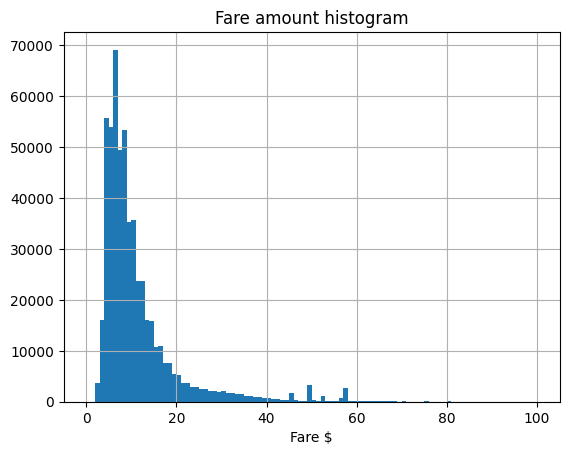

In [109]:
taxi_fare_train_df[taxi_fare_train_df.fare_amount <= 100].fare_amount.hist(bins=100)
plt.xlabel('Fare $')
plt.title('Fare amount histogram')
plt.show()


Observation Fare Histogram
 * we can see some spikes between $40 and $60, they might be some fixed price to reach some place for example to/from airport 

In [110]:
taxi_fare_train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [111]:
taxi_fare_train_df.pickup_datetime.sample(5)

14991    2014-08-02 19:39:00+00:00
228777   2011-10-10 08:40:00+00:00
465829   2011-12-12 00:08:00+00:00
215022   2015-02-11 17:34:43+00:00
460575   2011-03-13 18:17:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [112]:
def add_part_dates_time(df:pd.DataFrame, col_name:str) -> None: 
    """
    This function seperate datetime objects to seperate columns with year, month, day, weekday, hour
    and drop orignal datetime column
    """
    df[f'{col_name}_year'] = df[col_name].dt.year
    df[f'{col_name}_month'] = df[col_name].dt.month
    df[f'{col_name}_day'] = df[col_name].dt.day
    df[f'{col_name}_weekday'] = df[col_name].dt.weekday
    df[f'{col_name}_hour'] = df[col_name].dt.hour
    
    # we do not need original datetime column, so we can drop it
    df.drop(col_name, axis=1, inplace=True)

In [113]:
add_part_dates_time(df=taxi_fare_train_df, col_name='pickup_datetime')

/tmp/ipykernel_77871/2593422295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col_name}_year'] = df[col_name].dt.year
/tmp/ipykernel_77871/2593422295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col_name}_month'] = df[col_name].dt.month
/tmp/ipykernel_77871/2593422295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [114]:
taxi_fare_train_df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,4.0,-73.979813,40.751904,-73.979446,40.755482,1,2014,12,6,5,20
1,8.0,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,3,17
2,8.9,-73.996330,40.753223,-73.978897,40.766964,3,2011,6,15,2,18
3,6.9,-73.982430,40.745747,-73.982430,40.745747,1,2009,12,14,0,12
4,7.0,-73.959061,40.781059,-73.962059,40.768604,1,2013,11,6,2,11


#### Passanger Count

In [115]:
taxi_fare_train_df.passenger_count[taxi_fare_train_df.passenger_count>8].value_counts()

208    1
Name: passenger_count, dtype: int64

208 is just an outlier, so we can drop the row

In [116]:
taxi_fare_train_df = taxi_fare_train_df.drop(taxi_fare_train_df[taxi_fare_train_df['passenger_count']==208].index, axis=0)

In [117]:
taxi_fare_train_df.passenger_count[taxi_fare_train_df.passenger_count>8]

Series([], Name: passenger_count, dtype: uint8)

In [118]:
taxi_fare_train_df.passenger_count.describe()

count    552425.000000
mean          1.684605
std           1.308539
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [119]:
import numpy as np
bins = taxi_fare_train_df.passenger_count.unique()
np.sort(bins).tolist()

[0, 1, 2, 3, 4, 5, 6]

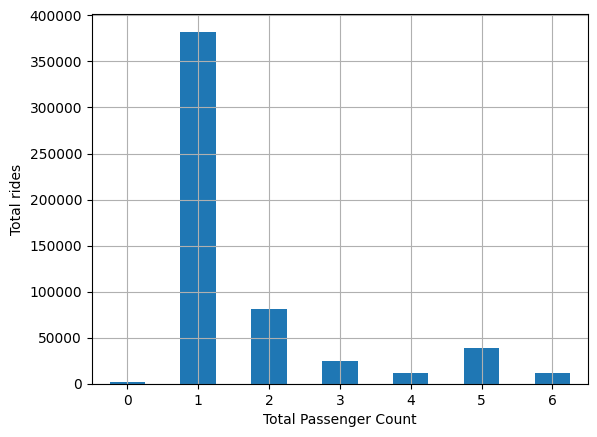

In [120]:
taxi_fare_train_df.passenger_count.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Total Passenger Count')
plt.ylabel('Total rides')
plt.show()

In [121]:
taxi_fare_train_df.passenger_count[taxi_fare_train_df.passenger_count<1].value_counts()

0    1977
Name: passenger_count, dtype: int64

Observation:
* it seems single person used highest number of rides 
* 0 person used minimum number of rides, why/How 0 ??? (maybe wrong data)

#### Pickup and Dropoff

Quick google ([stackoverflow](https://stackoverflow.com/a/23914607)) gave me this info

Google Maps actually uses signed values to represent the position:

* Latitude : max/min 90.0000000 to -90.0000000

* Longitude : max/min 180.0000000 to -180.0000000

In [122]:
taxi_fare_train_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour'],
      dtype='object')

In [123]:
taxi_fare_train_df[
    [
        'pickup_longitude', 
        'pickup_latitude',
        'dropoff_longitude', 
        'dropoff_latitude'
    ]
].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,552425.000000,552425.000000,552425.000000,552425.000000
mean,-72.497673,39.910820,-72.504814,39.934517
std,11.616459,8.060401,12.073039,9.254642
min,-1183.362793,-3084.490234,-3356.729736,-2073.150635
25%,-73.992020,40.734875,-73.991425,40.733990
50%,-73.981819,40.752621,-73.980179,40.753101
75%,-73.967163,40.767036,-73.963737,40.768059
max,2420.209473,404.983337,2467.752686,3351.403076


In [124]:
def drop_longitude_lattitude_outliers(df:pd.DataFrame, lat_col_name:str, long_col_name:str):
    """
    This function will drop values out side of following range
        Latitude : max/min 90.0000000 to -90.0000000
        Longitude : max/min 180.0000000 to -180.0000000
    """
    df = df.drop(df[df[lat_col_name] <-90].index, axis=0)
    df = df.drop(df[df[lat_col_name] > 90].index, axis=0)

    df = df.drop(df[df[long_col_name] <-180].index, axis=0)
    df = df.drop(df[df[long_col_name] > 180].index, axis=0)
    return df

In [125]:
# Lets fix these wrong values
taxi_fare_train_df[taxi_fare_train_df.pickup_latitude <-90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
211674,11.700000,2420.209473,-768.773865,2467.752686,2602.013672,1,2011,5,12,3,4
271000,4.100000,753.730652,-2073.150635,753.730652,-2073.150635,1,2011,5,2,0,10
522867,56.799999,0.000000,-3084.490234,-73.989571,40.729984,1,2012,10,15,0,19


In [126]:
taxi_fare_train_df[taxi_fare_train_df.pickup_latitude >90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
165729,24.1,-73.985756,404.983337,-73.865204,40.730995,1,2012,7,18,2,18
275282,8.1,-73.983368,404.766663,-73.992538,40.713943,2,2010,11,1,0,22
290750,6.5,-73.971680,403.616669,-73.990913,40.750687,1,2011,12,12,0,15
502200,4.9,-73.963333,404.899994,-73.972412,40.764744,1,2012,3,20,1,8


In [127]:
taxi_fare_train_df[taxi_fare_train_df.dropoff_latitude <-90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
271000,4.1,753.730652,-2073.150635,753.730652,-2073.150635,1,2011,5,2,0,10


In [128]:
taxi_fare_train_df[taxi_fare_train_df.dropoff_latitude > 90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
64113,10.5,757.866577,-80.926849,-554.935364,3351.403076,1,2011,8,18,3,0
211674,11.7,2420.209473,-768.773865,2467.752686,2602.013672,1,2011,5,12,3,4
296761,4.9,-73.991226,40.751190,-73.983383,488.133331,1,2011,9,29,3,20
299914,6.0,-73.972458,40.762020,-73.960274,404.416656,1,2012,9,26,2,17
300992,6.1,-73.985840,40.768150,-73.965836,426.100006,5,2011,11,25,4,8
421100,15.0,-74.015869,40.711102,0.000000,1336.233276,1,2012,11,8,3,8
438781,10.5,1754.718384,-59.907227,-3356.729736,1589.816162,1,2012,2,4,5,15
471348,24.1,-73.985580,40.759747,-0.216667,404.433319,1,2012,6,29,4,15
547423,7.7,-73.979492,40.784489,-73.966164,413.583344,3,2012,7,15,6,13


In [129]:
# Droping these outliers
taxi_fare_train_df = drop_longitude_lattitude_outliers(
    df=taxi_fare_train_df, 
    lat_col_name='pickup_latitude', 
    long_col_name='pickup_longitude'
    )
taxi_fare_train_df= drop_longitude_lattitude_outliers(
    df=taxi_fare_train_df, 
    lat_col_name='dropoff_latitude', 
    long_col_name='dropoff_longitude'
    )

In [130]:
taxi_fare_train_df.pickup_latitude.describe()

count    552402.000000
mean         39.919506
std           6.084963
min         -74.015877
25%          40.734875
50%          40.752621
75%          40.767036
max          48.500000
Name: pickup_latitude, dtype: float64

In [131]:
taxi_fare_train_df.pickup_longitude.describe()

count    552402.000000
mean        -72.500748
std          10.440210
min         -98.449997
25%         -73.992020
50%         -73.981819
75%         -73.967163
max          40.805866
Name: pickup_longitude, dtype: float64

In [132]:
taxi_fare_train_df.dropoff_latitude.describe()

count    552402.000000
mean         39.919041
std           6.089039
min         -74.036423
25%          40.733990
50%          40.753101
75%          40.768059
max          74.013000
Name: dropoff_latitude, dtype: float64

In [133]:
taxi_fare_train_df.dropoff_longitude.describe()

count    552402.000000
mean        -72.499893
std          10.441896
min         -84.636475
25%         -73.991425
50%         -73.980179
75%         -73.963737
max          54.658901
Name: dropoff_longitude, dtype: float64

First lets plot pick and dropoff points on map to visualize more nicely.
As we're dealing with location data, I want to plot the coordinates on a map. 

* longitude = -74.0063889
* lattitude = 40.7141667 

I define a bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from the testset. This way, I'm sure to train a model for the full pickup/dropoff coordinate range of the test set. \

From Open Street Map I grab a map and I drop any datapoint outside this box.

In [134]:
# minimum and maximum longitude test set
min(taxi_fare_test_df.pickup_longitude.min(), taxi_fare_test_df.dropoff_longitude.min()), \
max(taxi_fare_test_df.pickup_longitude.max(), taxi_fare_test_df.dropoff_longitude.max())

(-74.263245, -72.986534)

In [135]:
# minimum and maximum latitude test set
min(taxi_fare_test_df.pickup_latitude.min(), taxi_fare_test_df.dropoff_latitude.min()), \
max(taxi_fare_test_df.pickup_latitude.max(), taxi_fare_test_df.dropoff_latitude.max())

(40.568974, 41.709557)

In [136]:
import matplotlib.cm as cm

In [137]:
def plot_on_map(df:pd.DataFrame, bounding_box:tuple, nyc_map, s:int=10, alpha:float=0.2)-> None:
    fig, axs = plt.subplots(1,2,figsize=(20, 12))

    colors = cm.rainbow(np.linspace(0, 1, len(df)))
    axs[0].scatter(
        df.pickup_longitude, 
        df.pickup_latitude, 
        alpha=alpha, 
        c=colors, 
        s=s)
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=bounding_box)

    axs[1].scatter(
        df.dropoff_longitude, 
        df.dropoff_latitude,  
        alpha=alpha, 
        c=colors, 
        s=s)
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=bounding_box)
    plt.show()


In [138]:
filename = 'nyc_-74.3_-73.7_40.5_40.9.png'
nyc_map_zoom_img = plt.imread(filename)

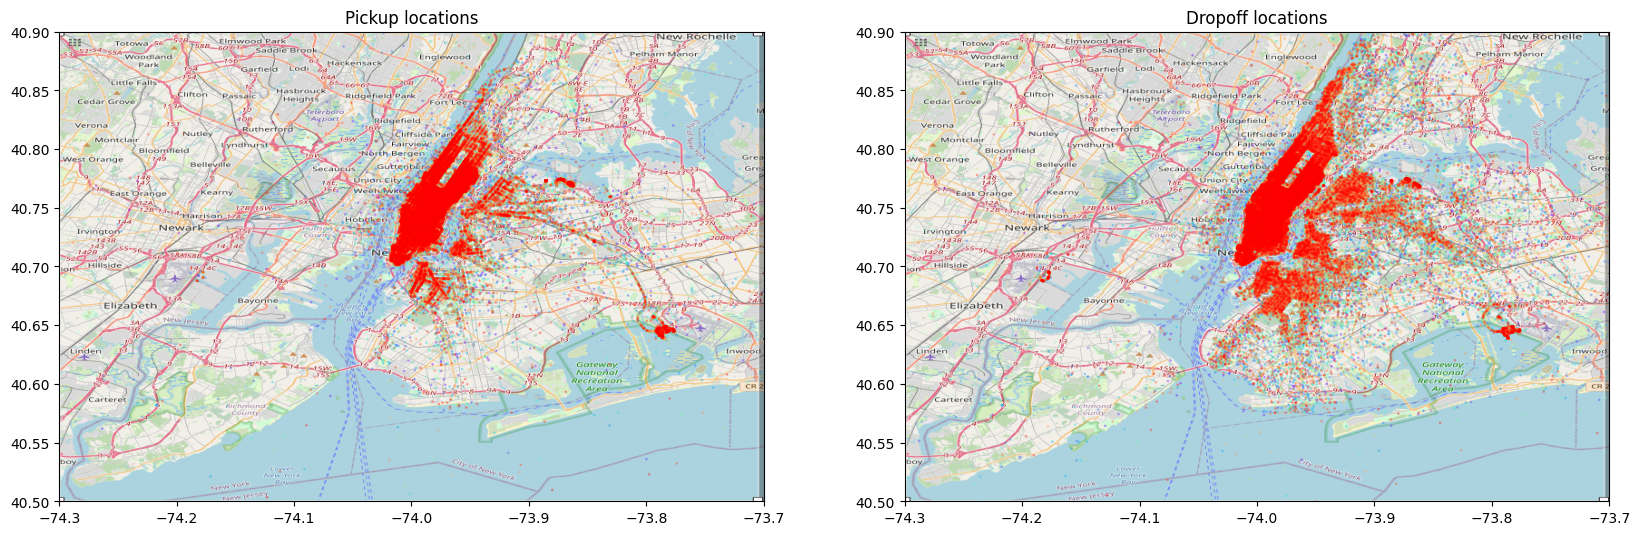

In [139]:
bounding_box_zoom = (-74.3, -73.7, 40.5, 40.9)
plot_on_map(taxi_fare_train_df, bounding_box_zoom, nyc_map_zoom_img, s=1, alpha=0.3)

#### Pickup and Dropoff date and time

##### Ask & Answer Questions

Lets try to answare following questions, 

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?

EDA + asking questions will help us develop a deeper understand of the data and give you ideas for feature engineering.

##### 1. What is the busiest day of the week?
To answare this question, lets visualize total number of ride on each day

In [141]:
time_df = taxi_fare_train_df.copy(deep=True)

In [171]:
time_df[f'weekday_name'] = taxi_fare_train_org_df['pickup_datetime'].dt.day_name()

In [172]:
# order day of the week by index 
from pandas.api.types import CategoricalDtype
days_of_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=days_of_week, ordered=True)
time_df['weekday_name'] = time_df['weekday_name'].astype(cat_type)

<AxesSubplot: xlabel='weekday_name'>

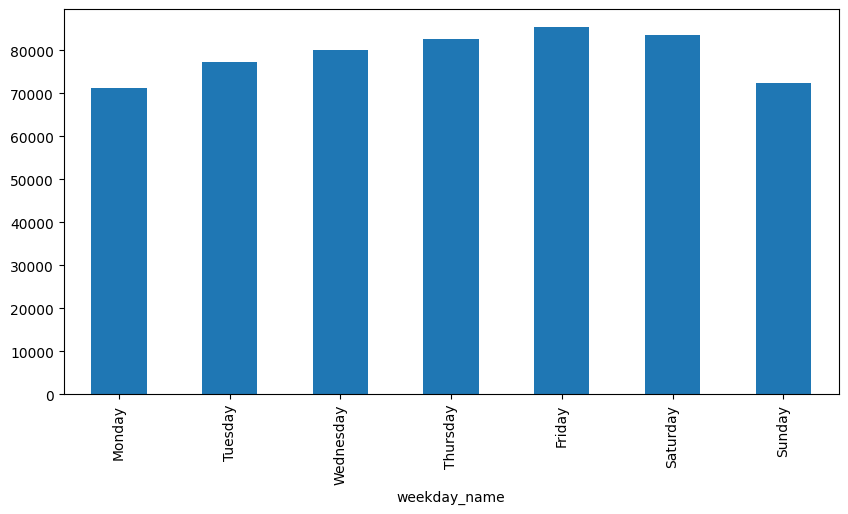

In [173]:
time_df.weekday_name.groupby([time_df['weekday_name']]).count().plot(kind='bar',figsize=(10,5))

Observations/Answare
* It seems most busiest days are 'Friday'and 'Saturday', possibly due to beginning of weekend, so people like to travel some places

##### 2. What is the busiest time of the day?

<AxesSubplot: xlabel='pickup_datetime_hour'>

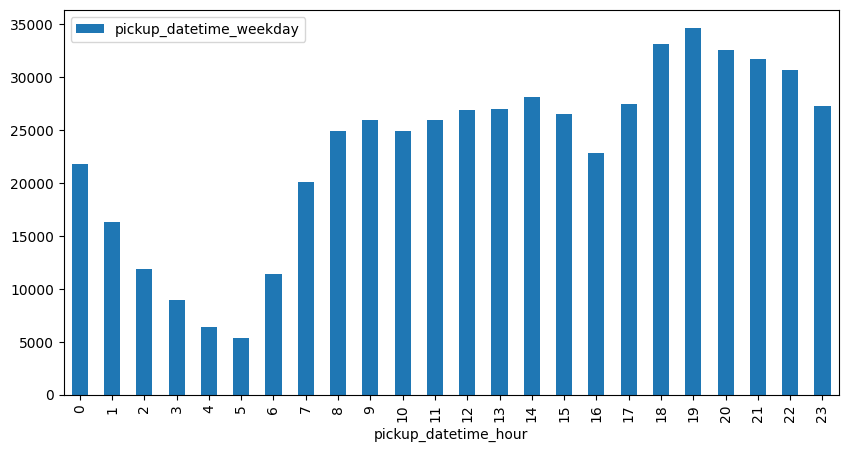

In [175]:
time_df[['pickup_datetime_weekday', 'pickup_datetime_hour']].groupby('pickup_datetime_hour').count().plot(kind='bar',figsize=(10,5))

Observations
* As we can see that, the most busiest time in a day is in between 17 - 00.

##### 3. In which month are fares the highest?

In [176]:
time_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'weekday_name'],
      dtype='object')

<AxesSubplot: xlabel='pickup_datetime_day'>

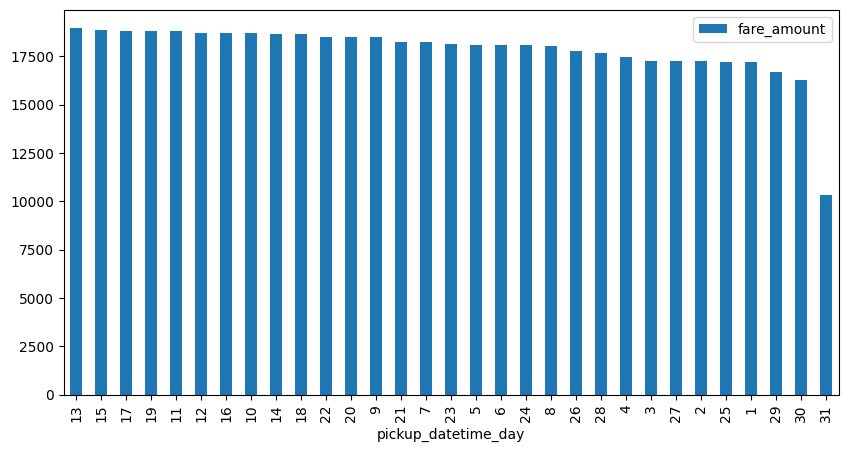

In [181]:
time_df[['fare_amount', 'pickup_datetime_day']] \
    .groupby('pickup_datetime_day')\
    .count()\
    .sort_values(by='fare_amount',ascending=False)\
    .plot(kind='bar',figsize=(10,5))

Observations
* On 13th, there is highest fare rate

##### 4. Which pickup locations have the highest fares?


##### 5. Which drop locations have the highest fares?


##### 6. What is the average ride distance?

#### fare_amount

## References
* https://www.kaggle.com/code/madhurisivalenka/cleansing-eda-modelling-lgbm-xgboost-starters
* https://www.kaggle.com/code/breemen/nyc-taxi-fare-data-exploration
* https://www.openstreetmap.org/export#map=10/41.1528/-73.6496